In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
path = 'add the path for processed dataset here'
df = pd.read_csv(path)
print(df.head())

  service_date station_name  gated_entries  tavg  tmin  tmax  prcp  wspd
0   2018-01-01      Airport         3236.0 -14.7 -17.7 -10.5   0.0  26.3
1   2018-01-01      Alewife         1416.0 -14.7 -17.7 -10.5   0.0  26.3
2   2018-01-01       Andrew         1310.0 -14.7 -17.7 -10.5   0.0  26.3
3   2018-01-01     Aquarium         1801.0 -14.7 -17.7 -10.5   0.0  26.3
4   2018-01-01    Arlington         1576.0 -14.7 -17.7 -10.5   0.0  26.3


In [8]:
for i in df.columns:
    print(i)
    print(df[i].value_counts())
    print()

service_date
service_date
2022-12-20    71
2023-01-21    71
2023-02-01    71
2023-01-31    71
2023-01-30    71
              ..
2019-10-19    48
2019-11-16    47
2019-11-17    47
2019-12-08    47
2019-12-07    46
Name: count, Length: 1886, dtype: int64

station_name
station_name
Kenmore            1886
Arlington          1886
Park Street        1886
State Street       1886
Boylston           1886
                   ... 
Gilman Square        82
Magoun Square        80
Medford/Tufts        80
Ball Square          80
East Somerville      79
Name: count, Length: 71, dtype: int64

gated_entries
gated_entries
1.00000        149
2.00000        122
3.00000        120
7.00000         89
6.00000         87
              ... 
25952.00000      1
14134.00000      1
17127.00000      1
15324.00000      1
2420.83332       1
Name: count, Length: 17143, dtype: int64

tavg
tavg
10.3    937
5.6     892
5.9     889
1.7     887
10.9    880
       ... 
28.8     62
30.3     61
31.5     61
28.5     61
31.0    

In [22]:
df.describe()

,gated_entries,tavg,tmin,tmax,prcp,wspd,tavg_bin
count,118892.000000,118892.000000,118892.000000,118892.000000,118892.000000,118892.000000,118892.000000
mean,4086.116150,11.581132,7.547982,15.848443,3.111387,17.762187,6.775645
std,4155.002463,9.499311,9.330450,10.161044,7.557941,6.116363,9.918647
min,0.000000,-17.800000,-23.300000,-12.100000,0.000000,2.500000,-20.000000
25%,1296.000000,3.900000,0.000000,7.200000,0.000000,13.700000,0.000000
50%,2754.000000,10.900000,7.200000,15.600000,0.000000,16.900000,10.000000
75%,5544.000000,20.000000,16.100000,23.900000,2.000000,21.200000,20.000000
max,33670.000000,32.300000,28.300000,37.800000,68.100000,61.200000,30.000000


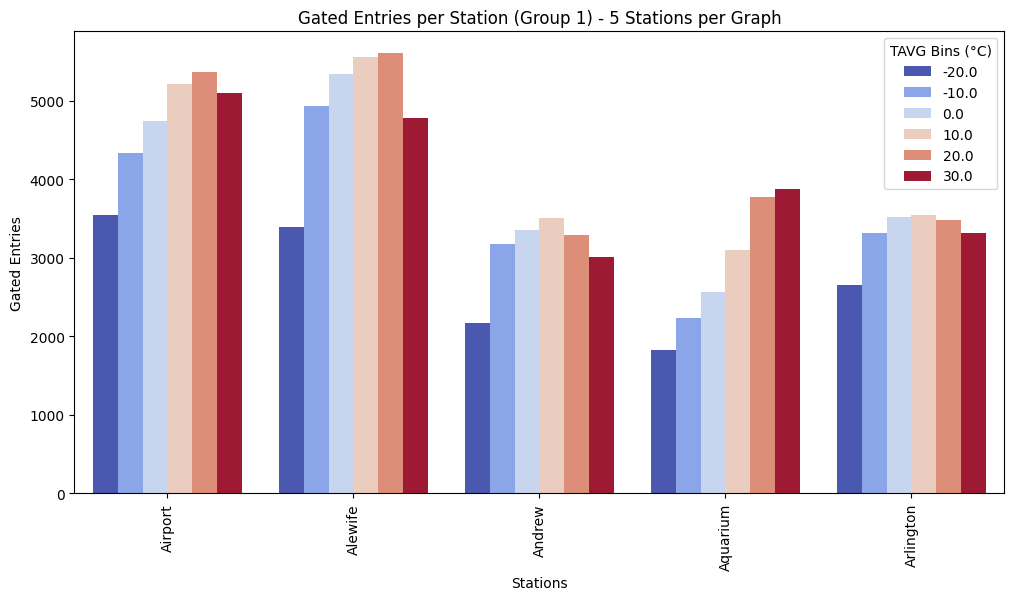

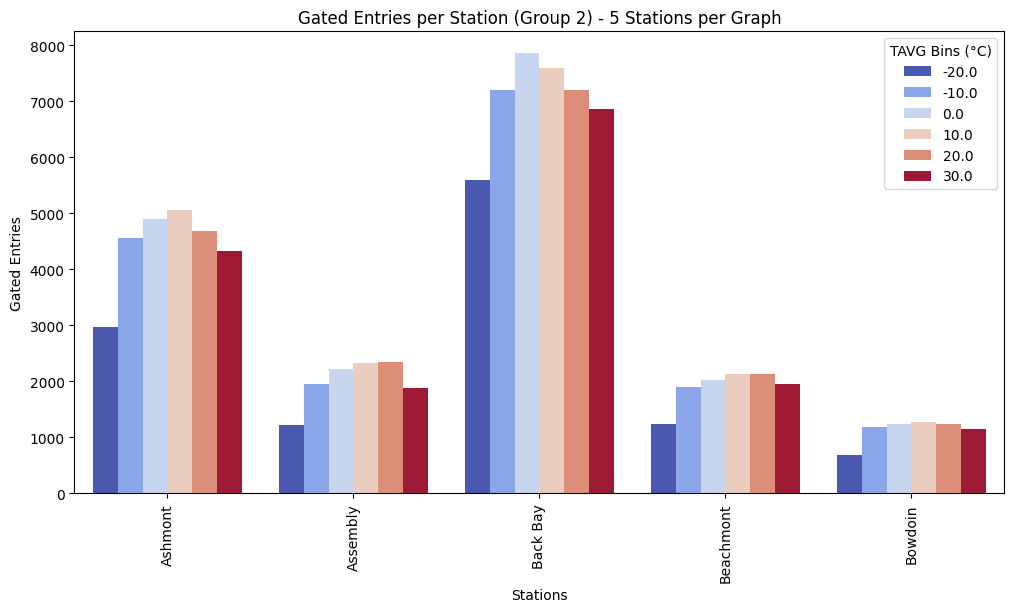

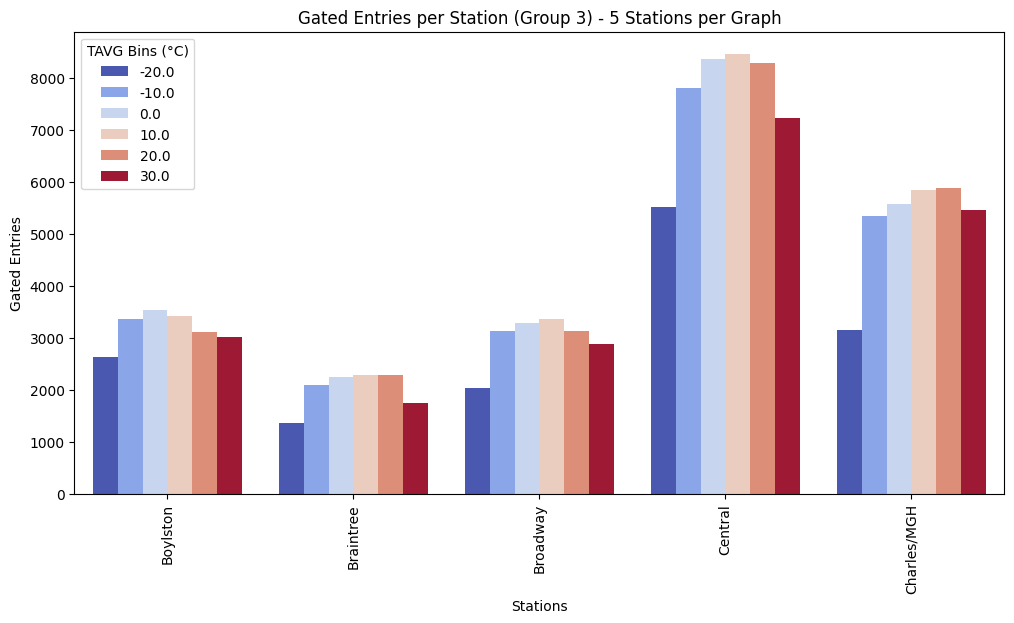

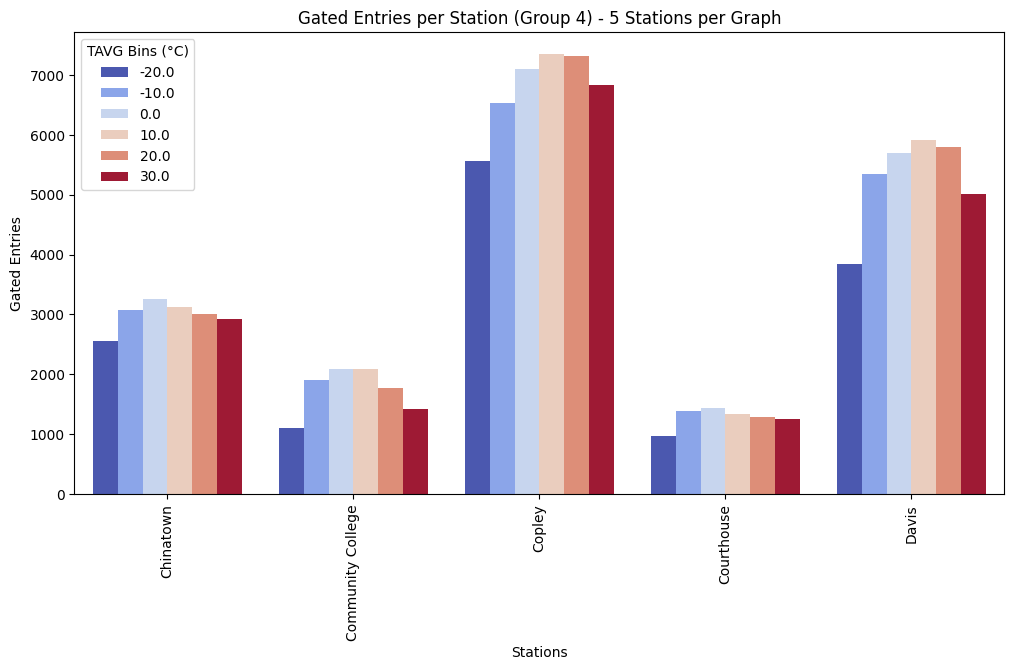

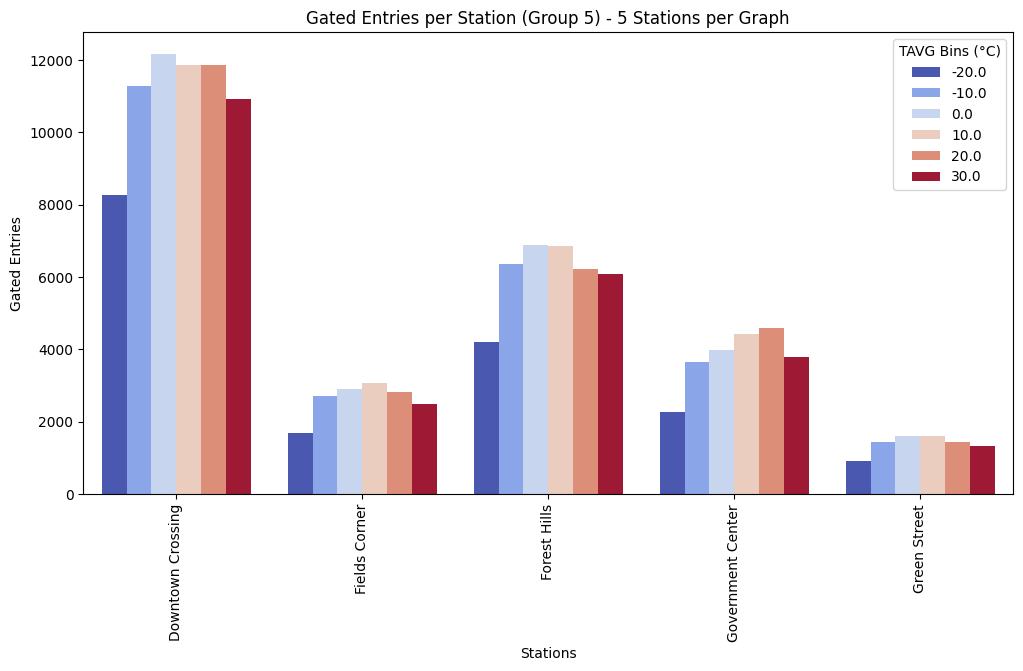

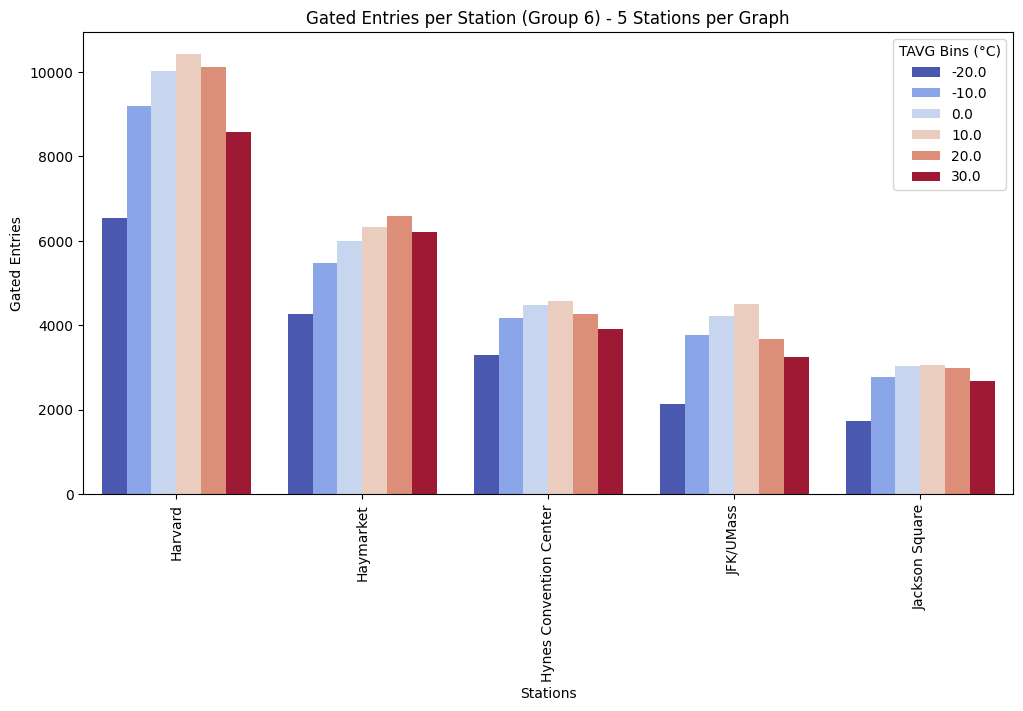

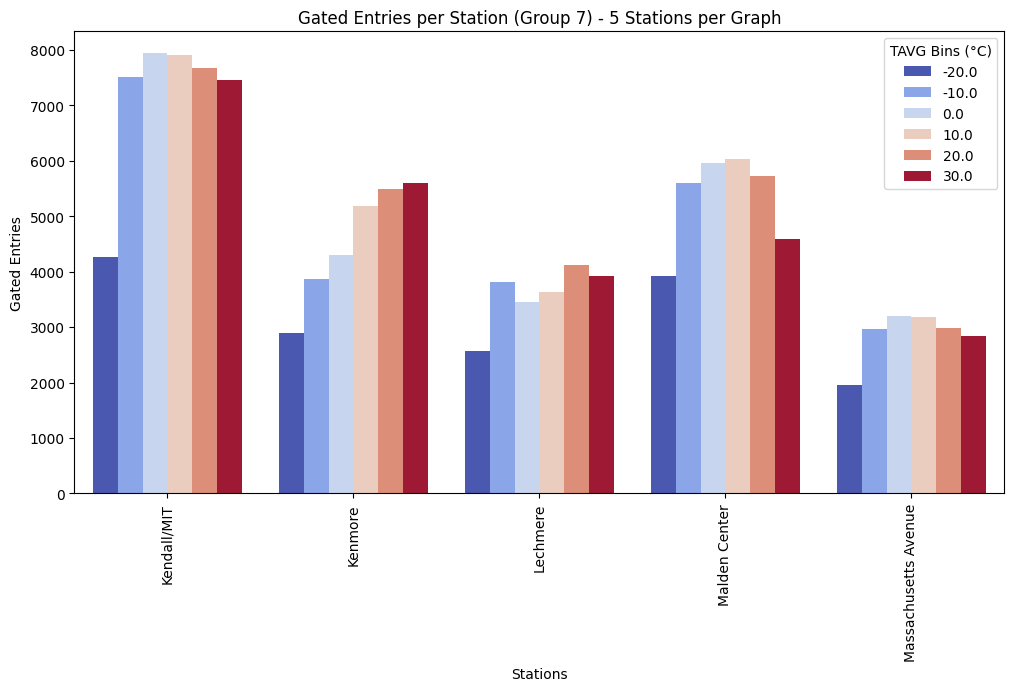

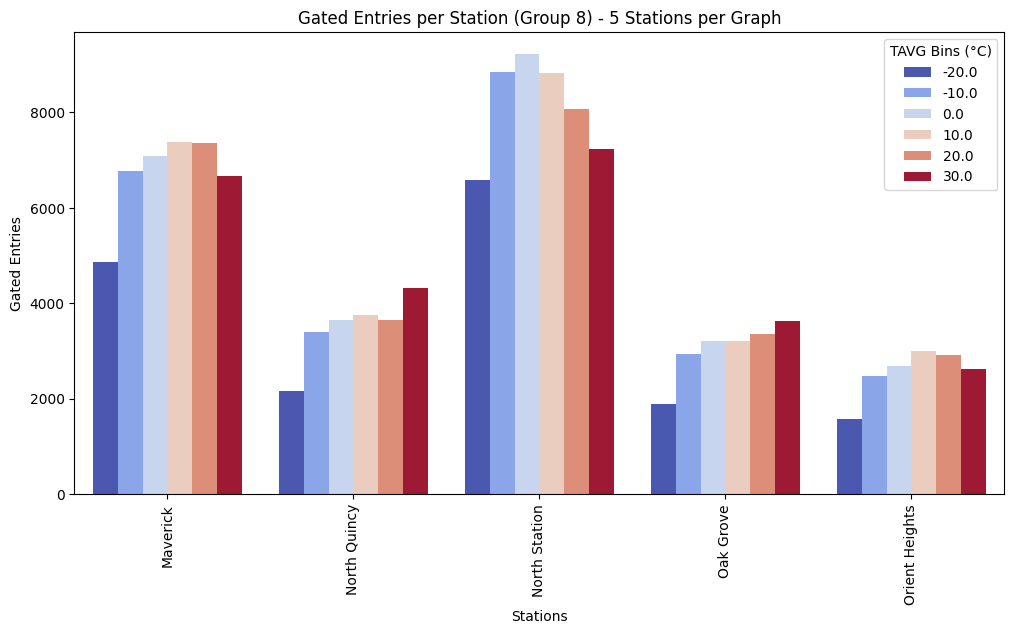

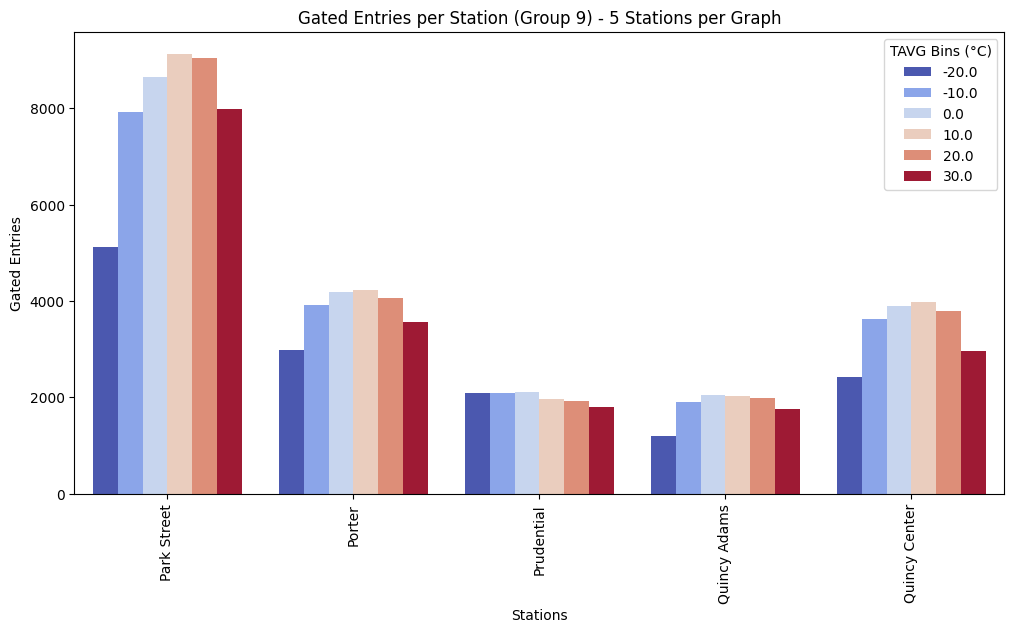

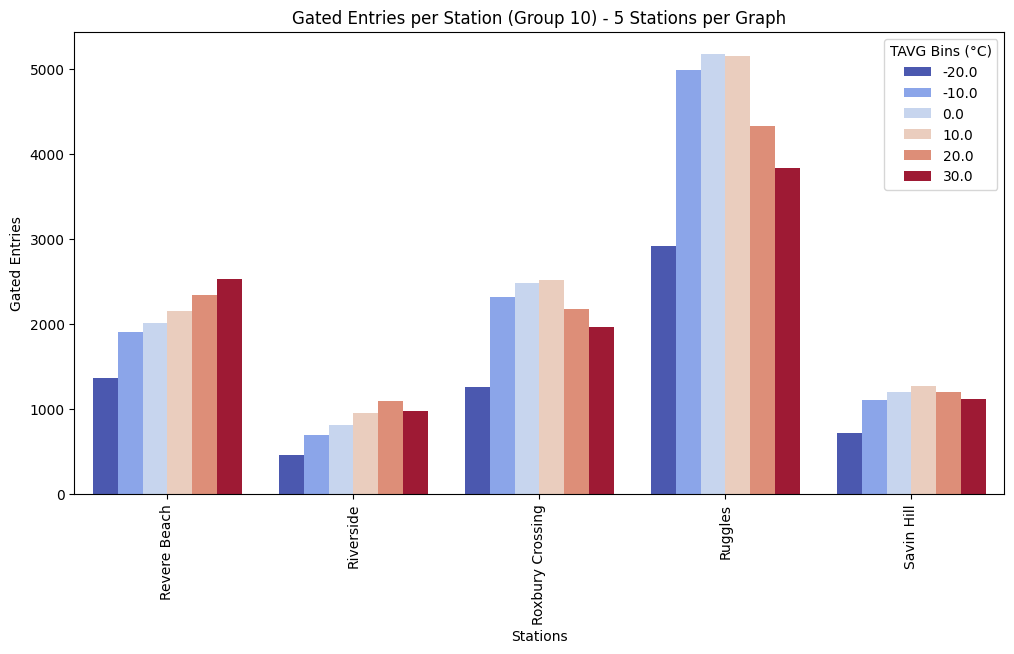

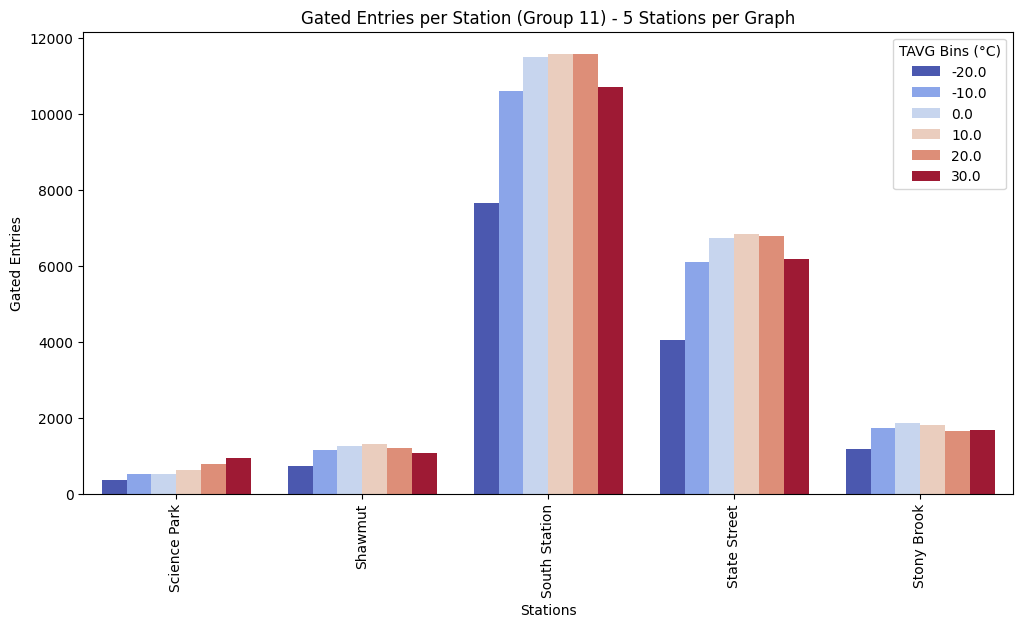

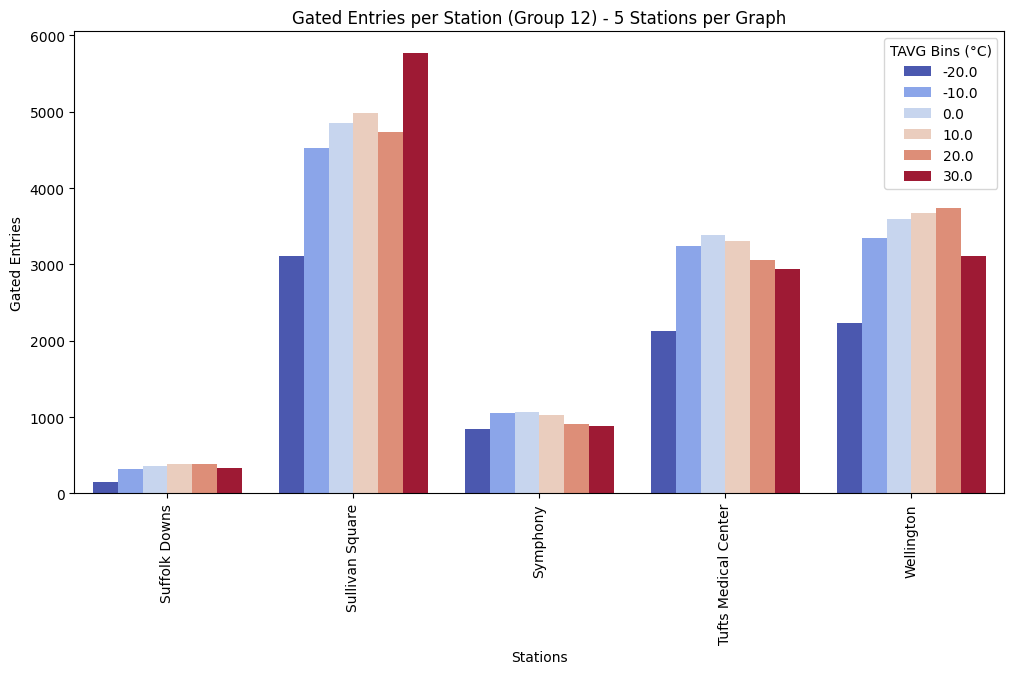

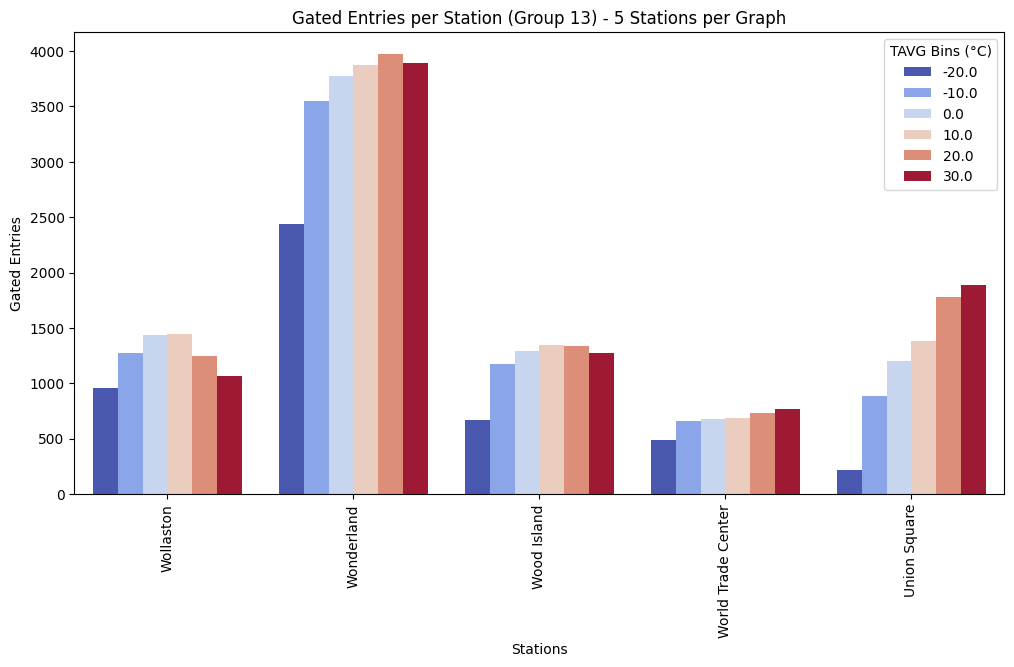

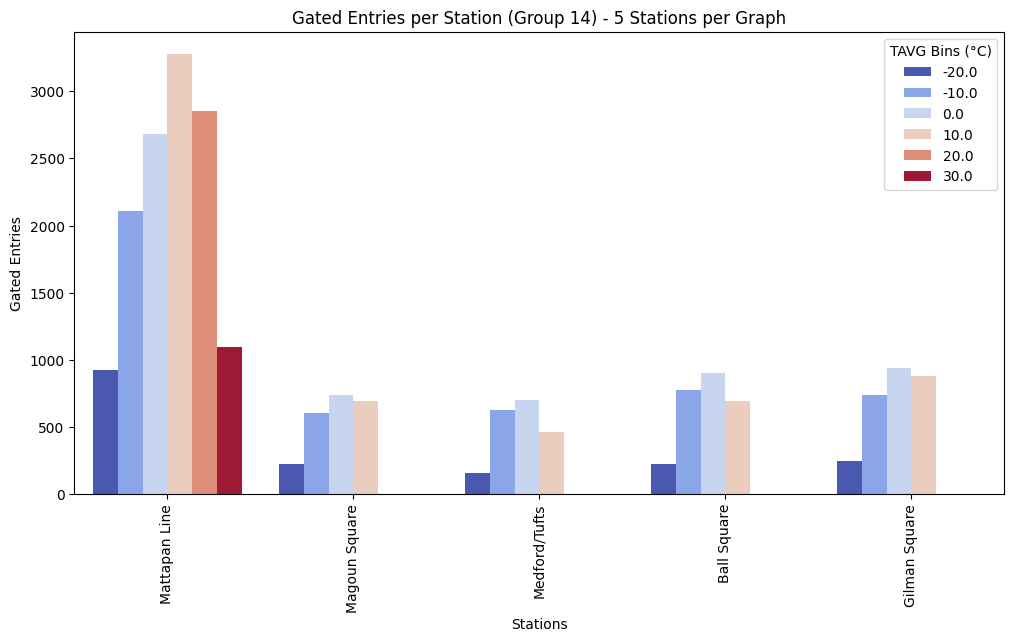

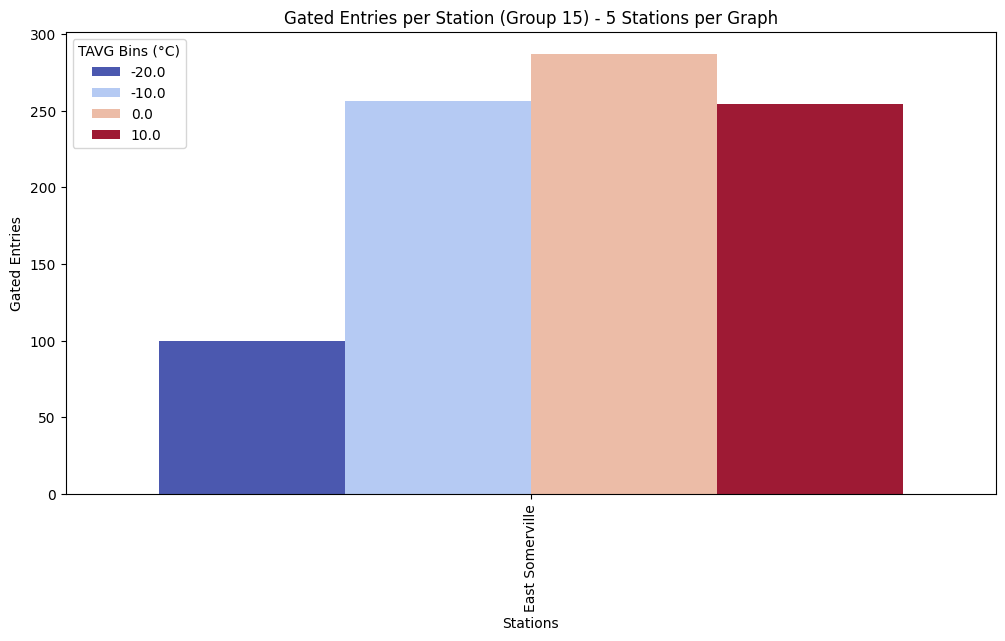

In [21]:
# Create bins for tavg in steps of 10 degrees

df["tavg_bin"] = (df["tavg"] // 10) * 10  # Grouping by 10-degree bins

# Get unique station names
stations = df["station_name"].unique()

# Split stations into chunks of 5c
station_groups = [stations[i:i + 5] for i in range(0, len(stations), 5)]

# Generate multiple graphs, each with 5 stations
for i, group in enumerate(station_groups):
    plt.figure(figsize=(12, 6))  # Set figure size

    # Filter data for the current group of 5 stations
    subset_df = df[df["station_name"].isin(group)]

    # Create bar plot
    sns.barplot(data=subset_df, x="station_name", y="gated_entries", hue="tavg_bin", palette="coolwarm", errorbar=None)

    # Customize plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.xlabel("Stations")
    plt.ylabel("Gated Entries")
    plt.title(f"Gated Entries per Station (Group {i+1}) - 5 Stations per Graph")
    plt.legend(title="TAVG Bins (°C)")

    # Show plot
    plt.show()

We can see a proper curve as the number of gated entries decreases. In certain places, like the aquarium and river beach, the numbers increase along with the temperatures. There might be a correlation because visits might increase due to the summer.

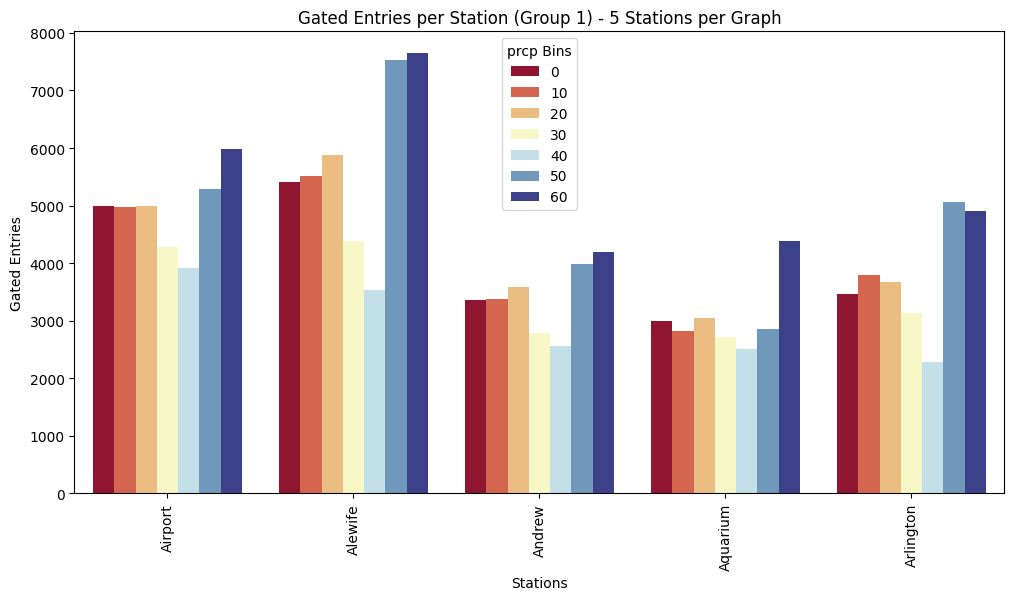

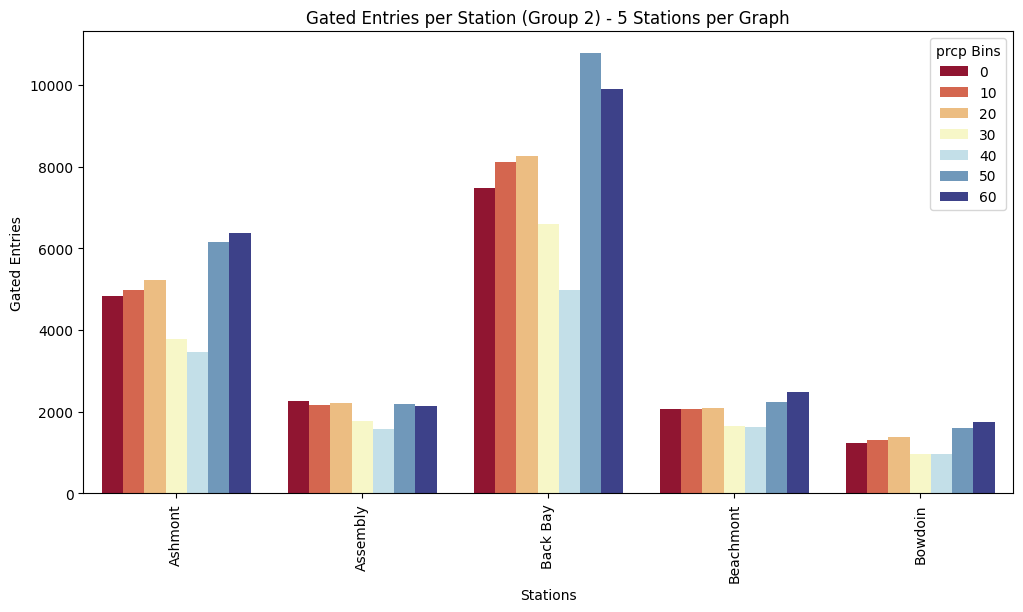

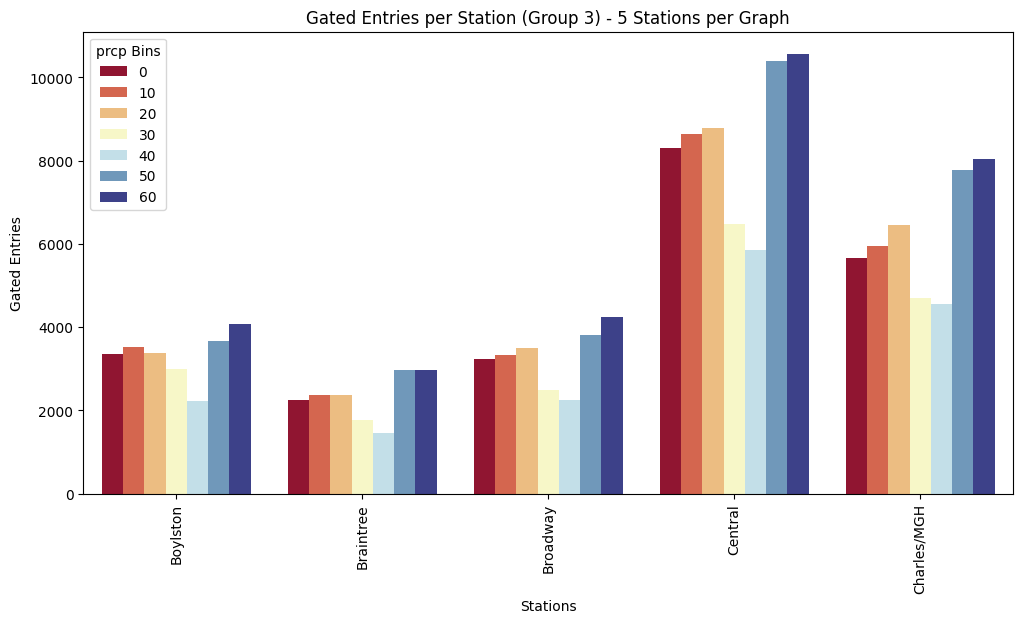

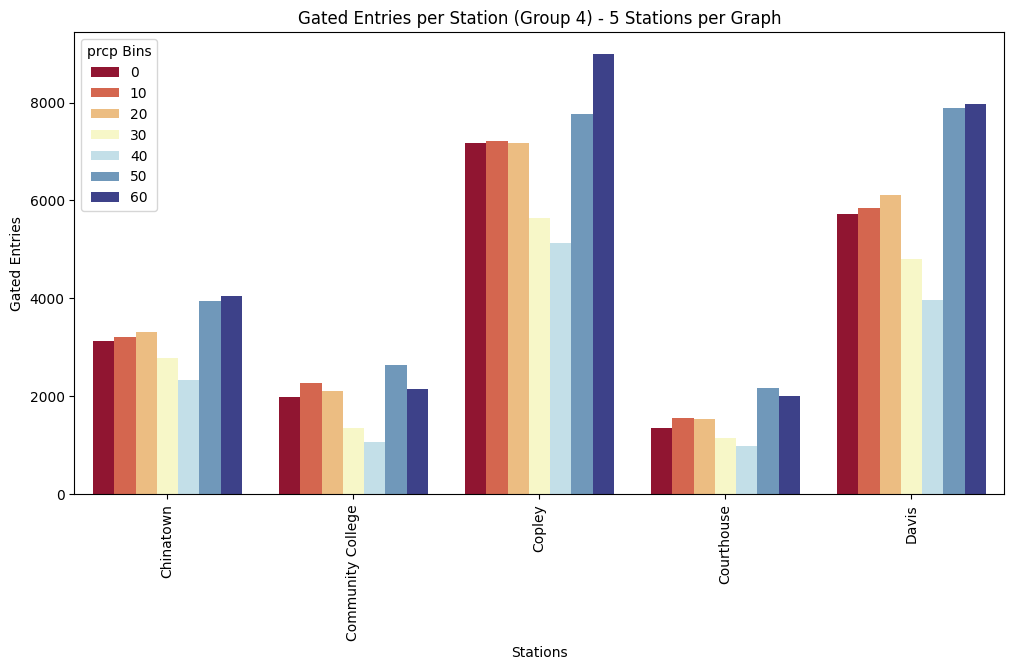

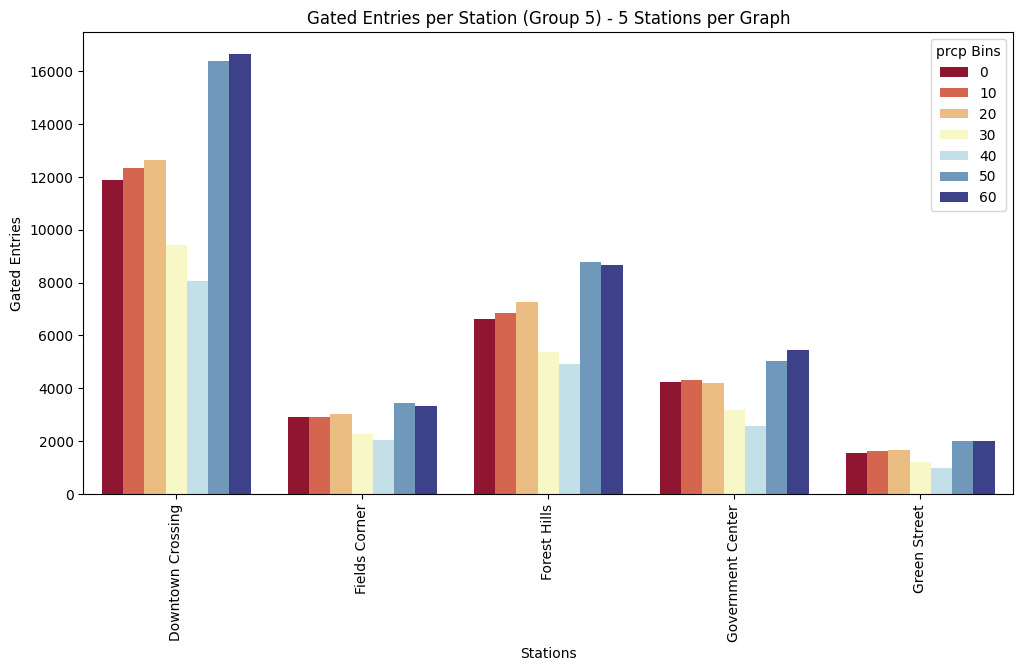

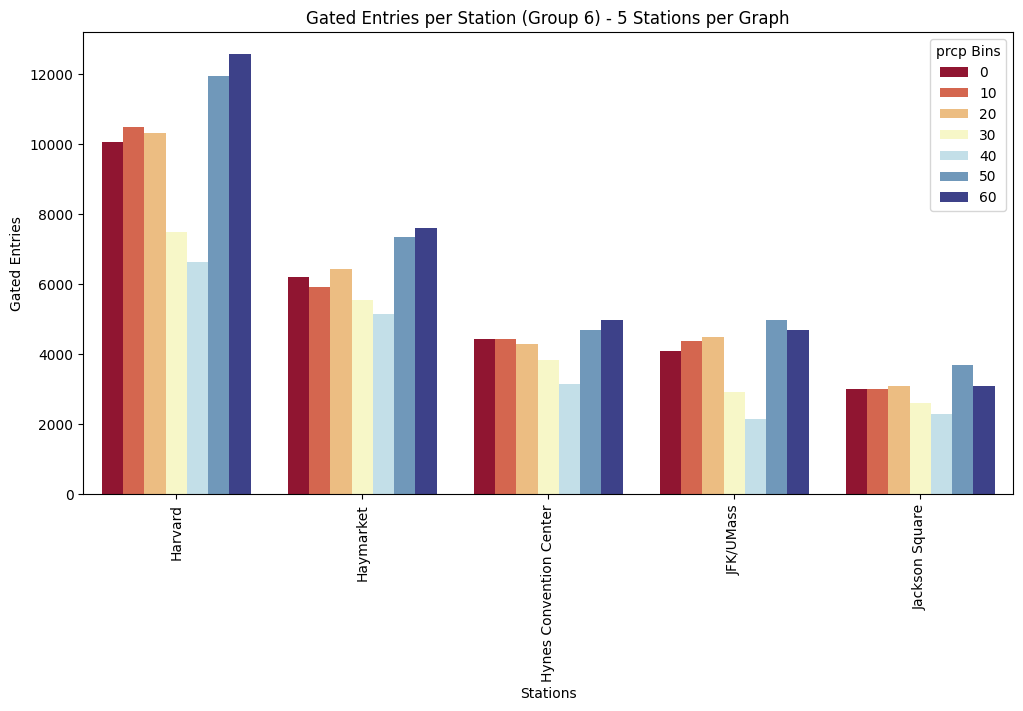

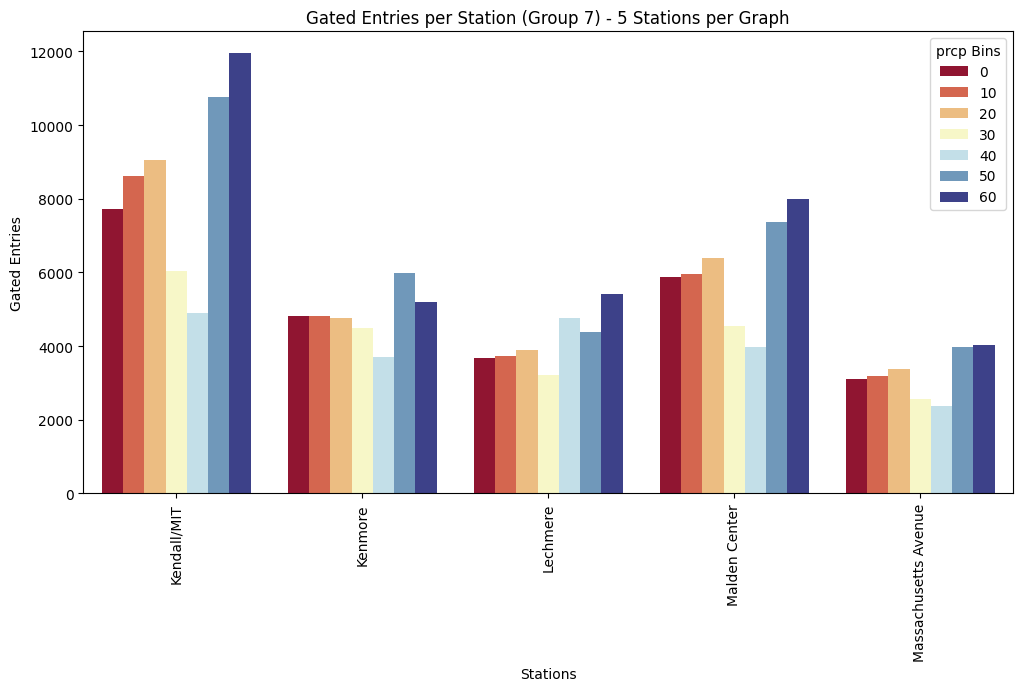

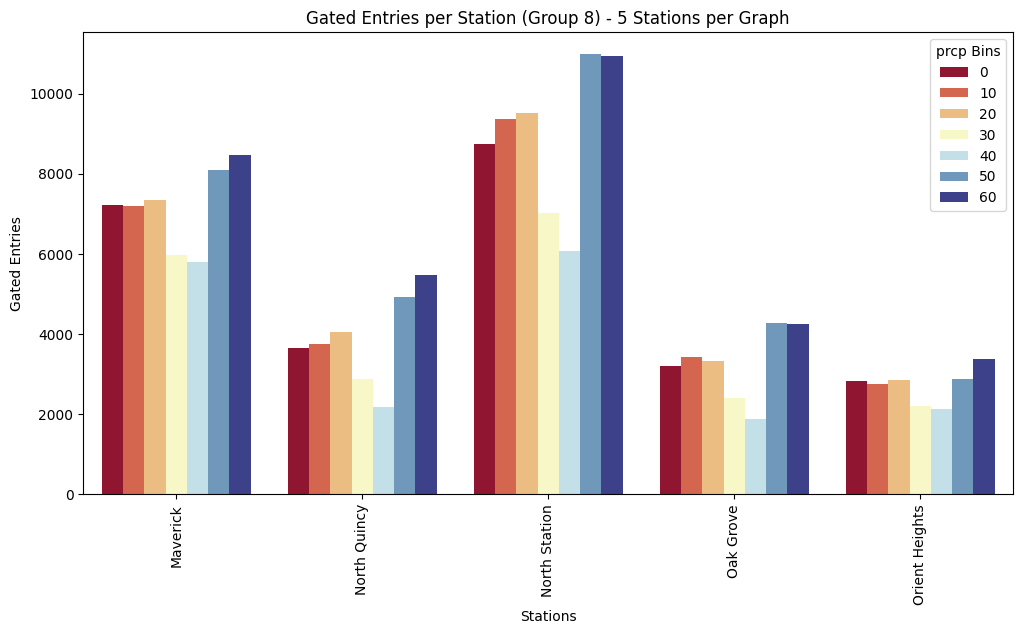

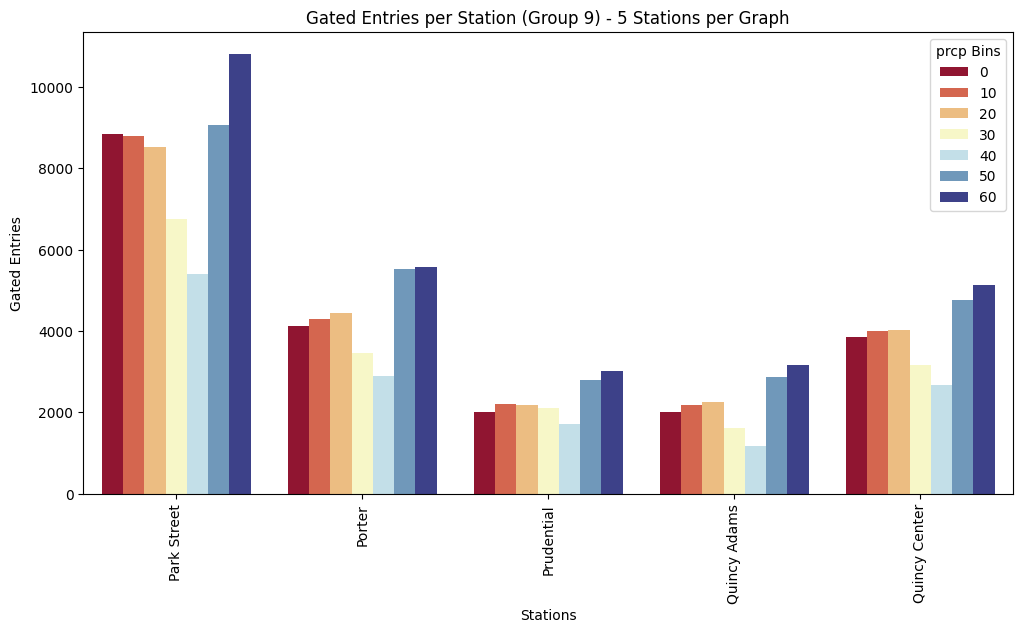

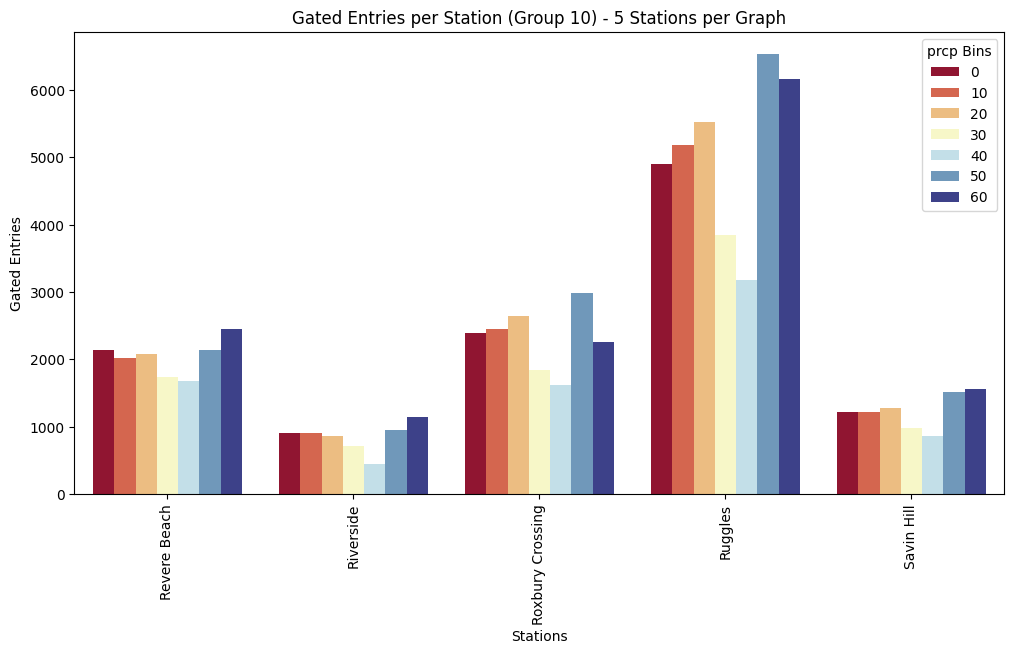

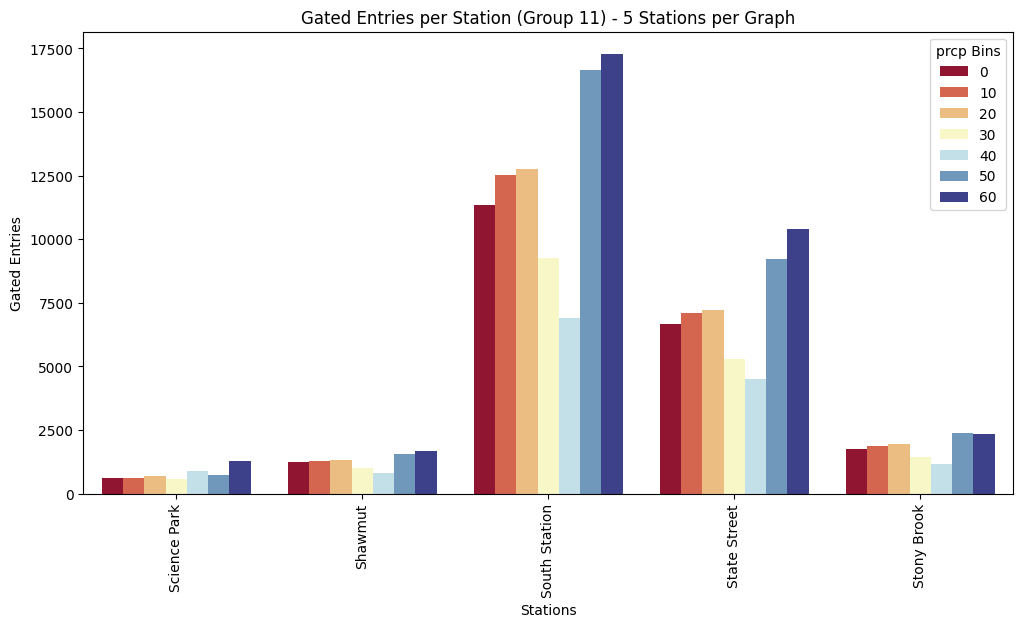

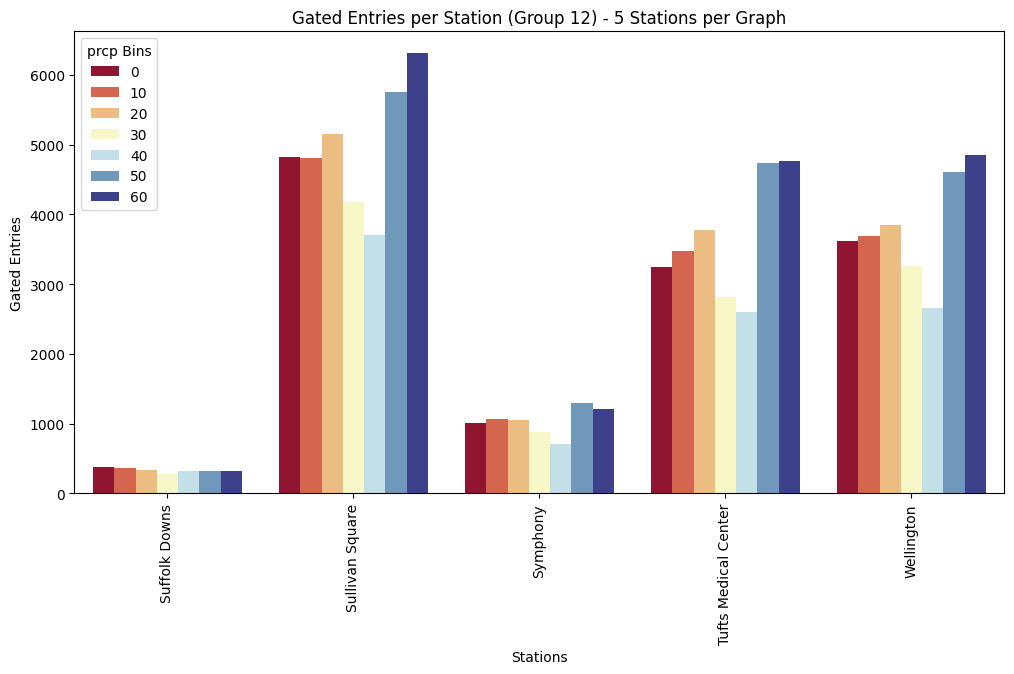

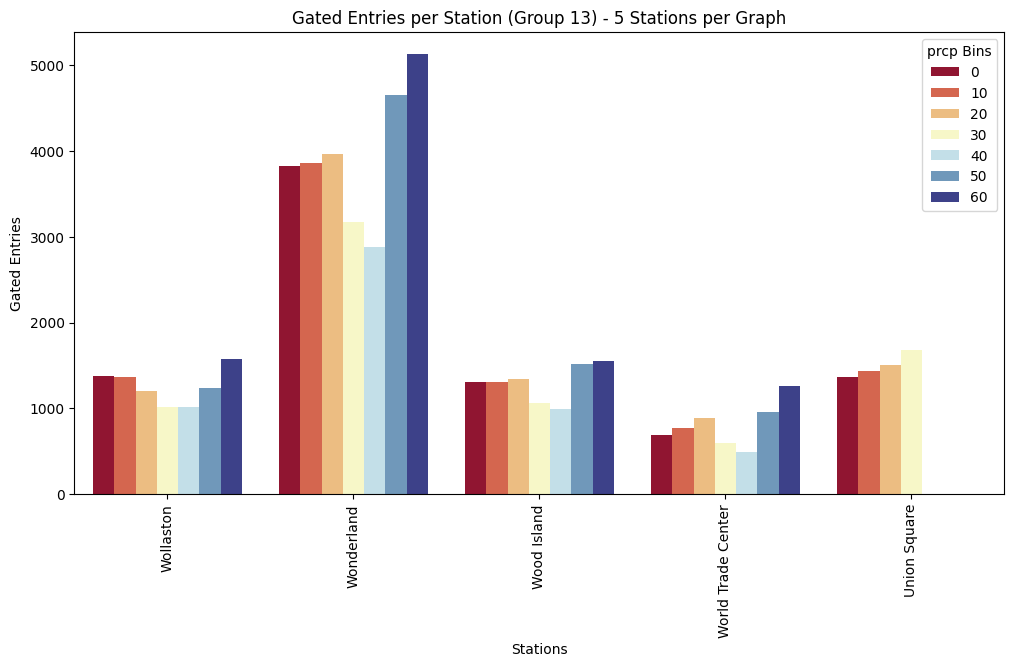

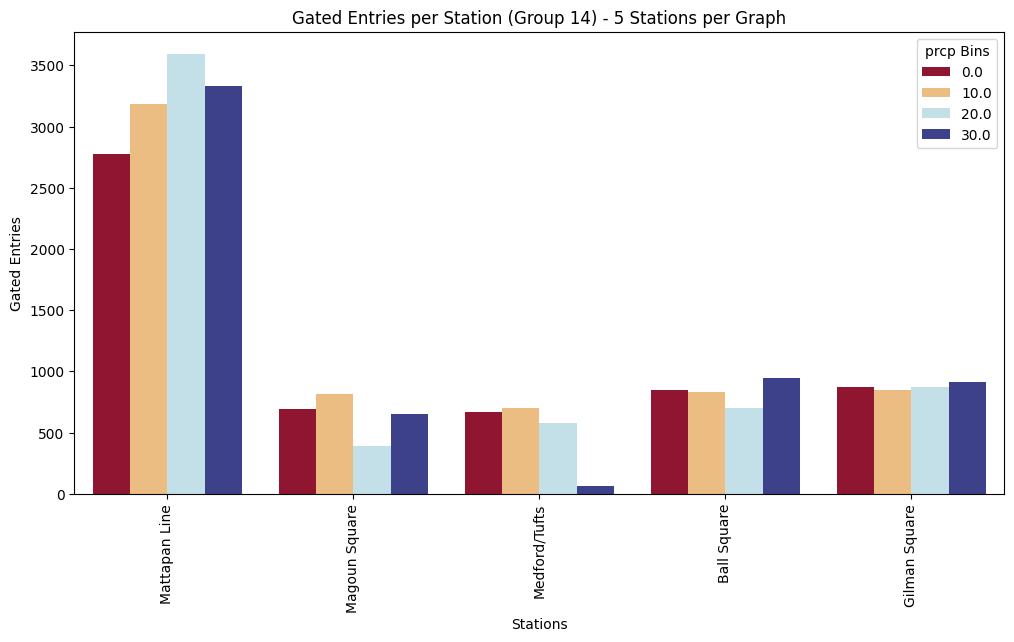

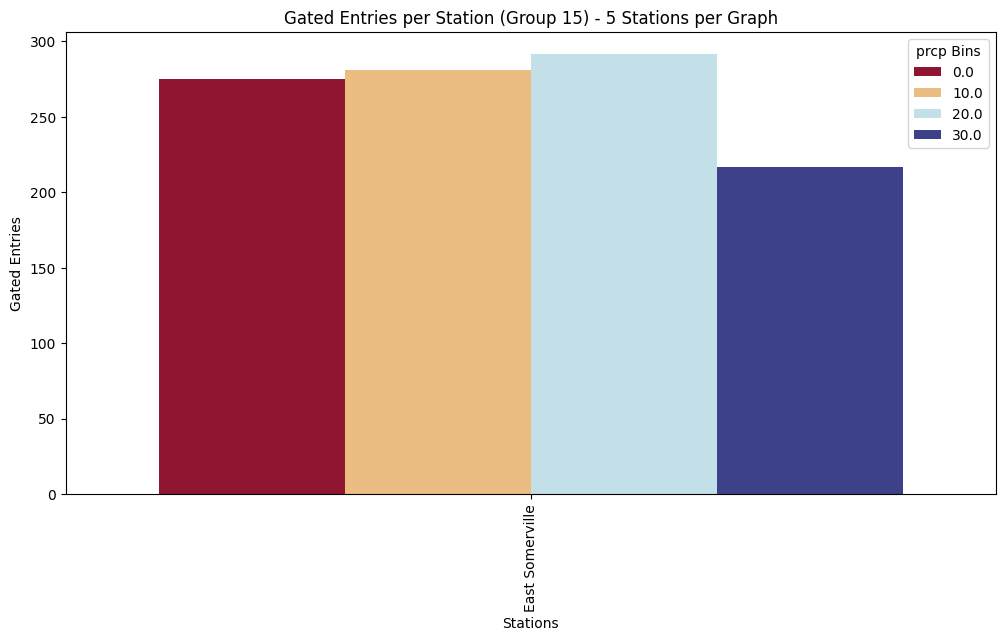

In [35]:
# Create bins for tavg in steps of 10 degrees

df["prcp_bin"] = (df["prcp"] // 10) * 10  # Grouping by 10-degree bins

# Get unique station names
stations = df["station_name"].unique()

# Split stations into chunks of 5c
station_groups = [stations[i:i + 5] for i in range(0, len(stations), 5)]

# Generate multiple graphs, each with 5 stations
for i, group in enumerate(station_groups):
    plt.figure(figsize=(12, 6))  # Set figure size

    # Filter data for the current group of 5 stations
    subset_df = df[df["station_name"].isin(group)]

    # Create bar plot
    sns.barplot(data=subset_df, x="station_name", y="gated_entries", hue="prcp_bin", palette="RdYlBu", errorbar=None)

    # Customize plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.xlabel("Stations")
    plt.ylabel("Gated Entries")
    plt.title(f"Gated Entries per Station (Group {i+1}) - 5 Stations per Graph")
    plt.legend(title="prcp Bins")

    # Show plot
    plt.show()

There is a common trend where, during initial precipitation levels (0 to 30mm)—ranging from no rainfall to light rain—people continue commuting as usual. However, at 40mm, due to heavy rainfall, many prefer using cars instead of public transport. At 60mm, during extreme rain or snowstorms, people are more likely to choose trams or public transit over cars due to safety and road conditions.

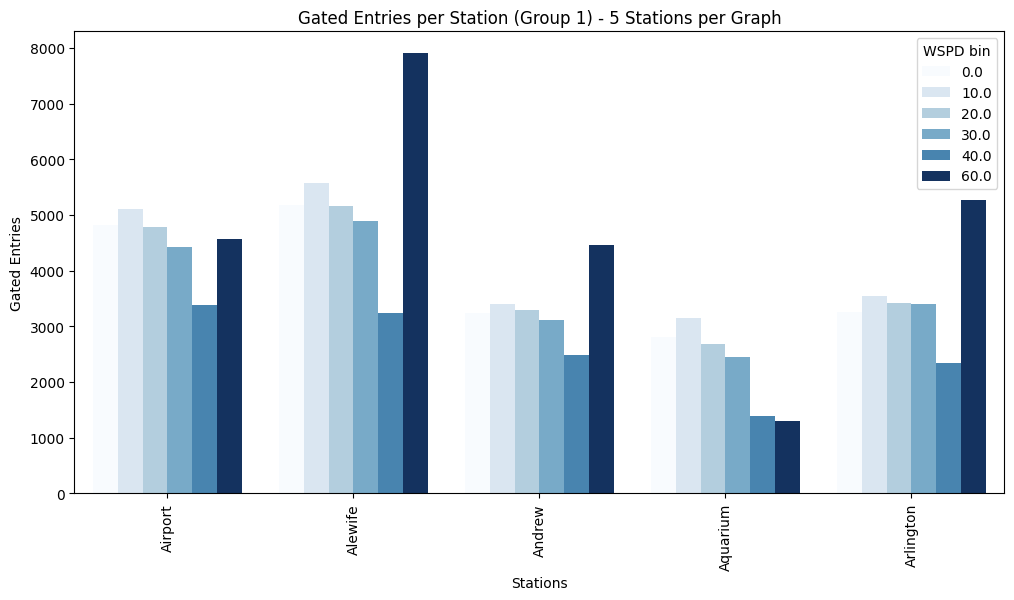

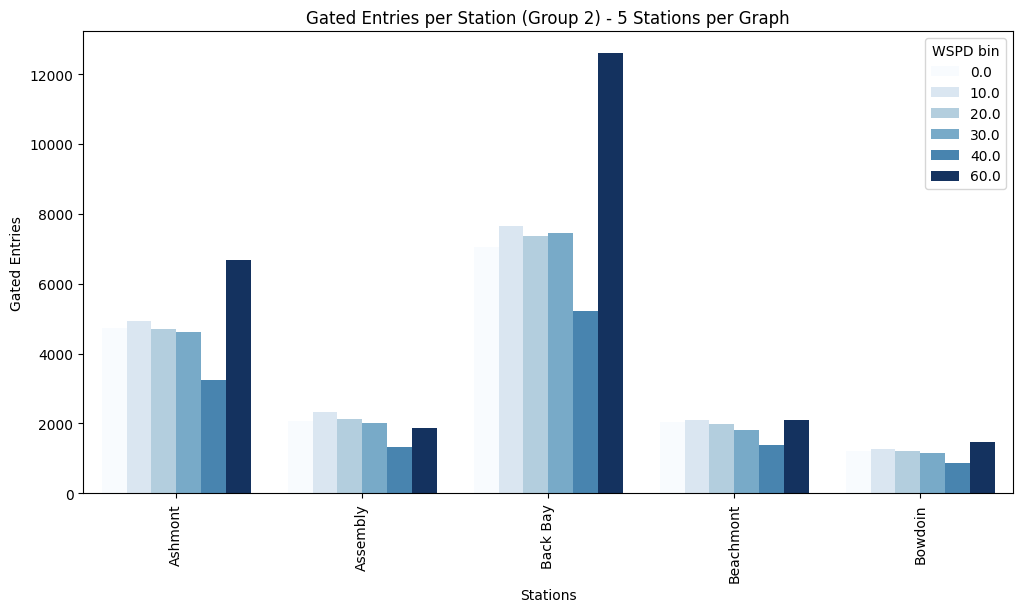

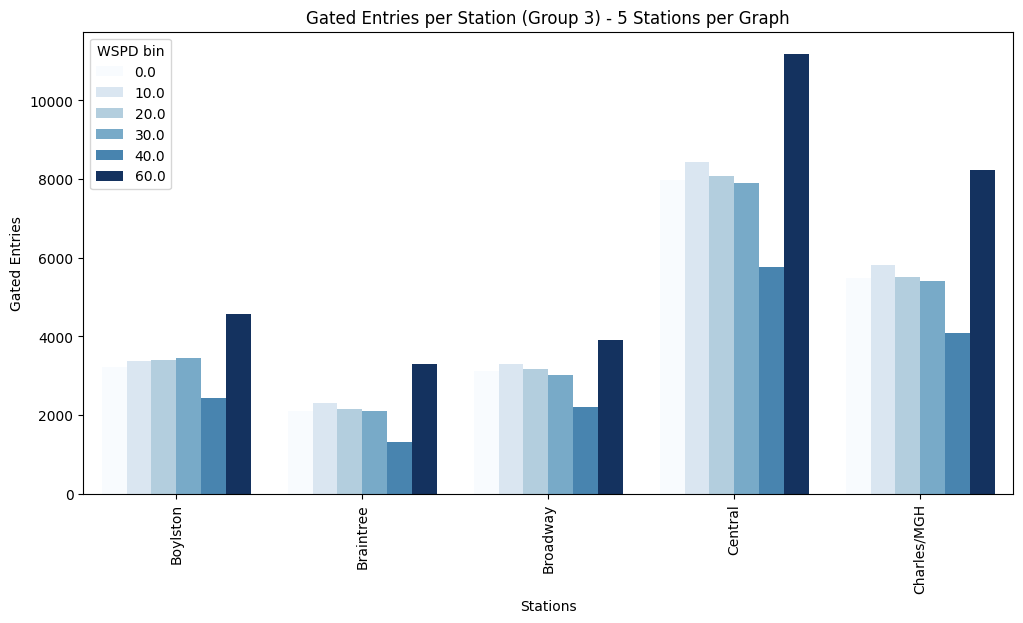

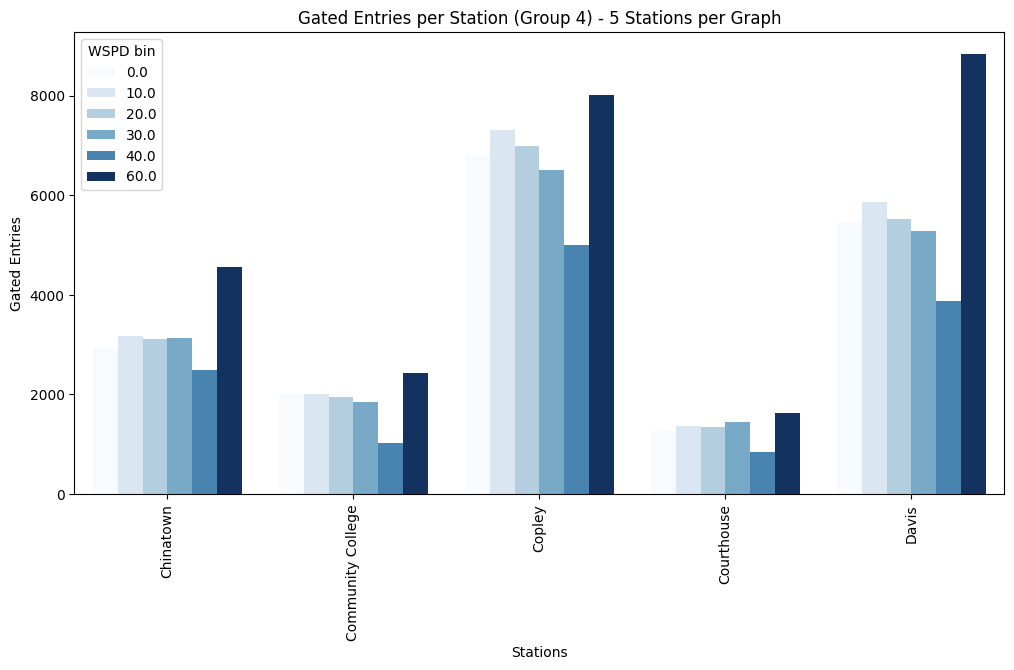

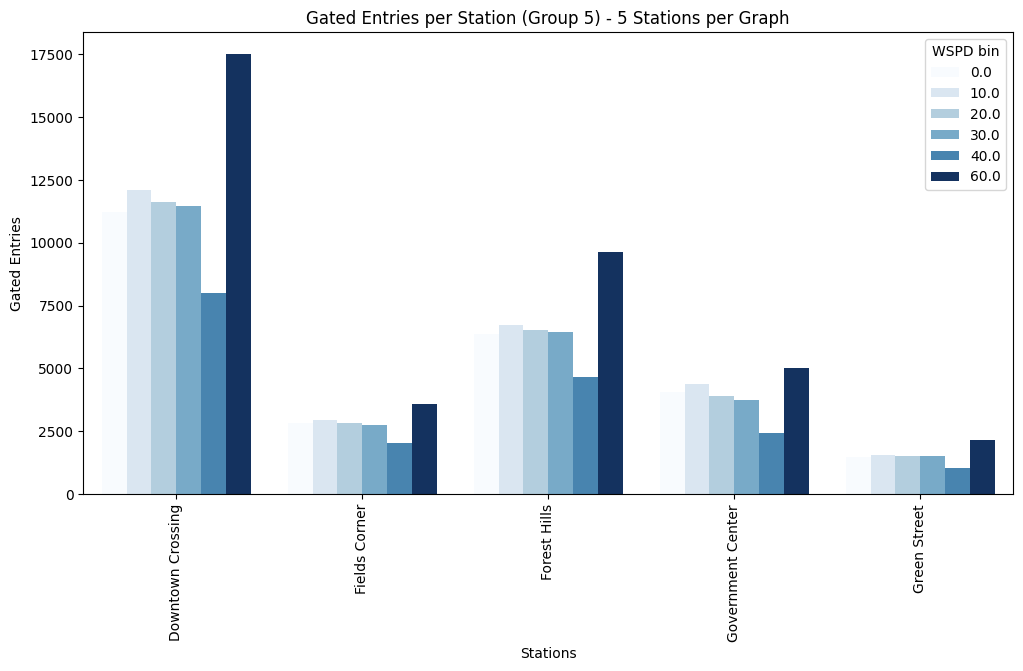

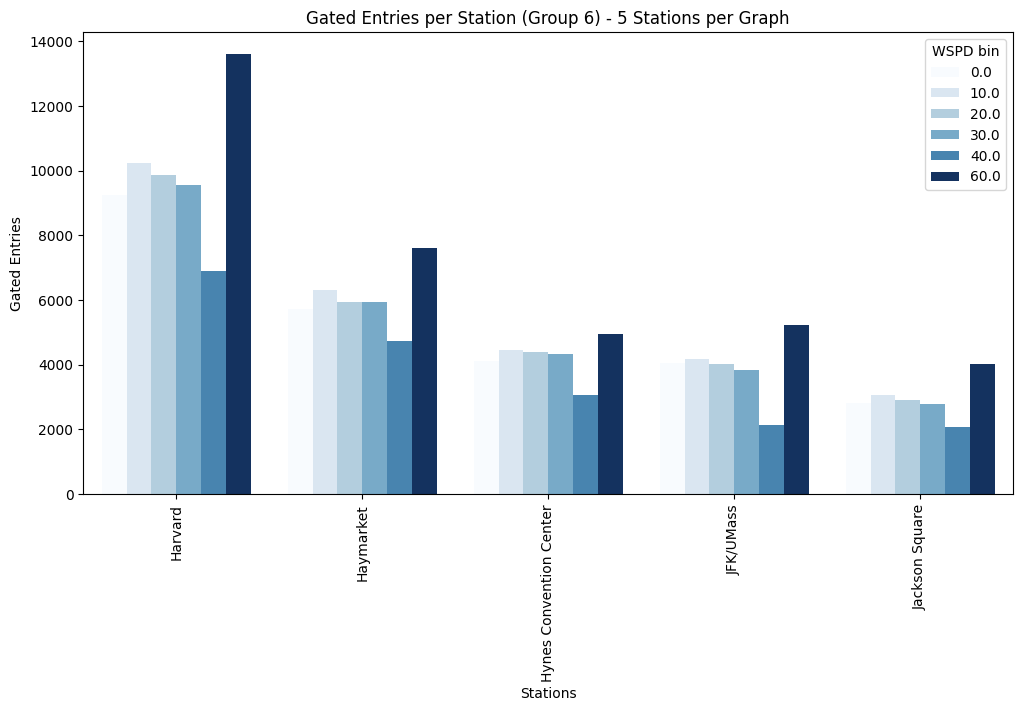

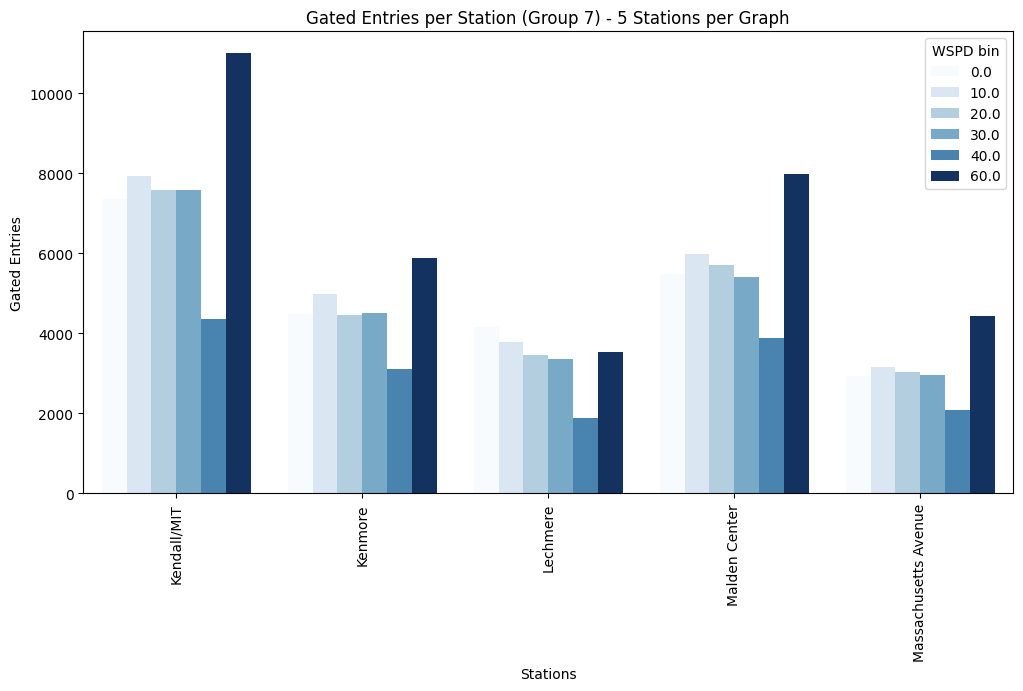

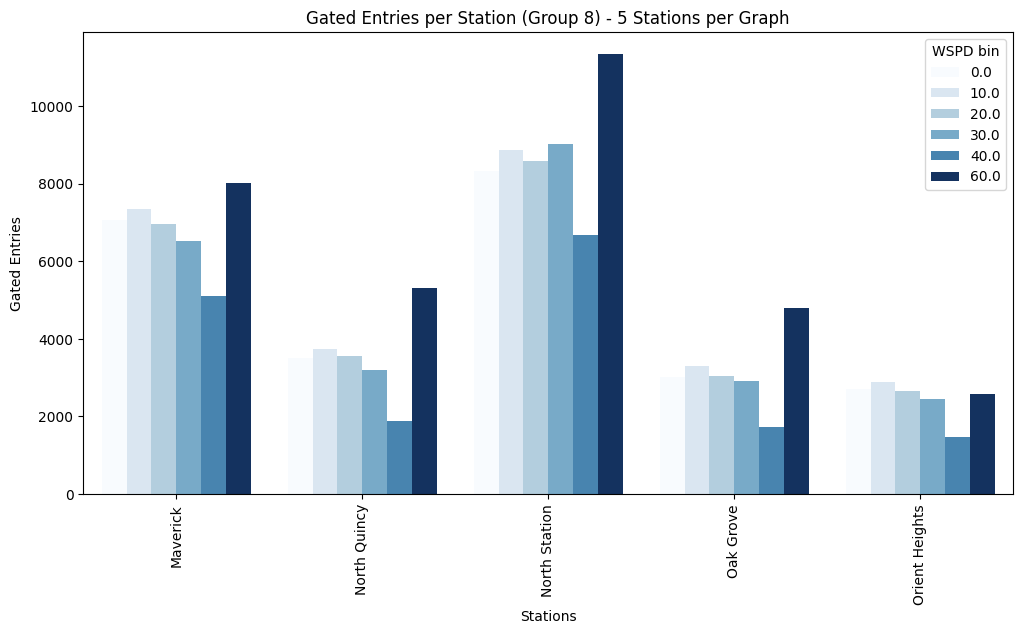

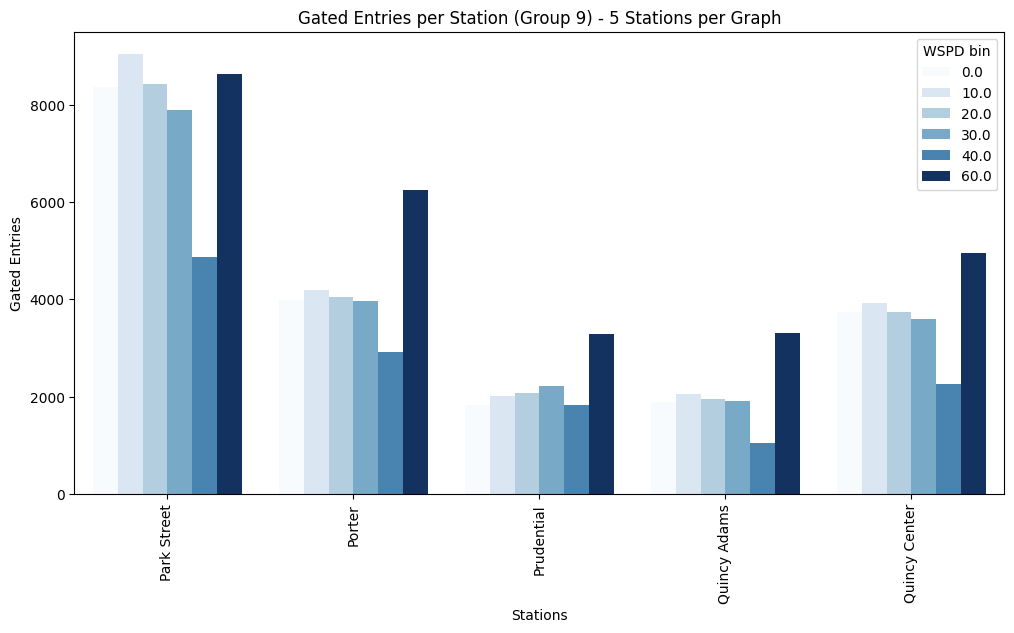

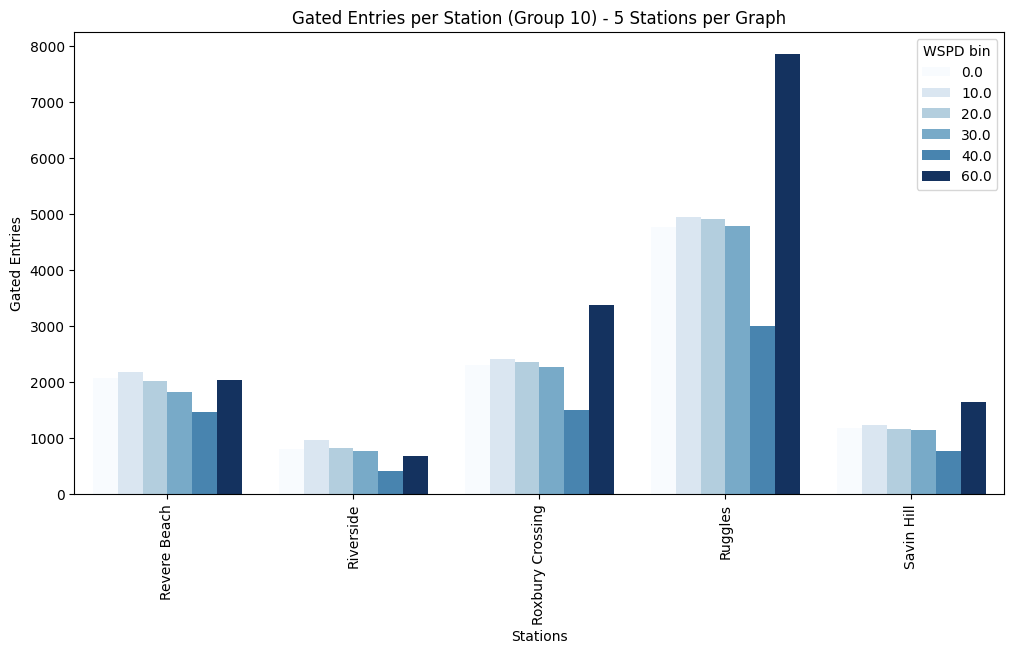

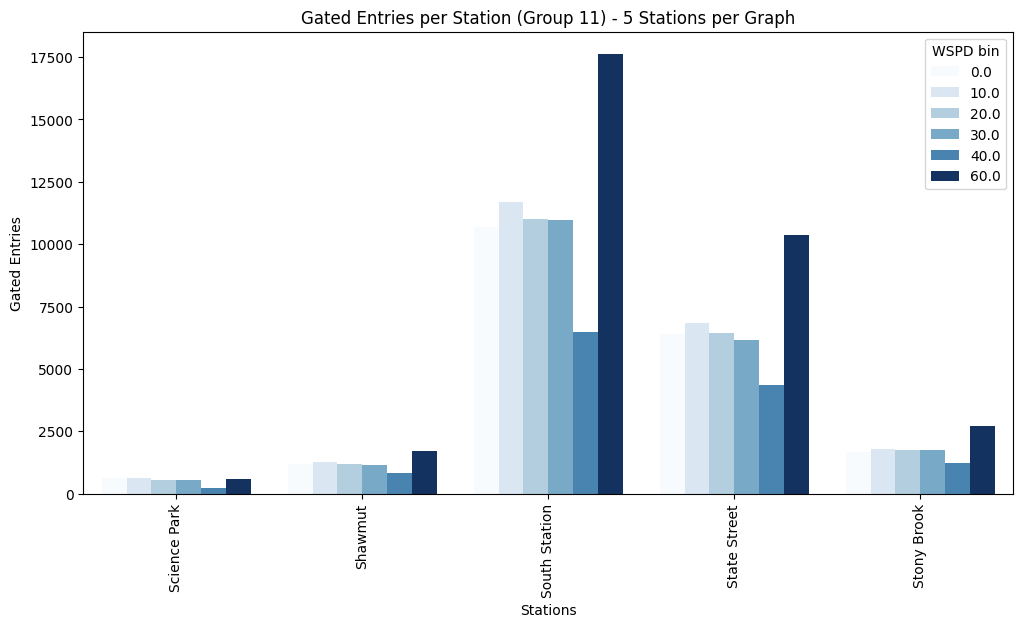

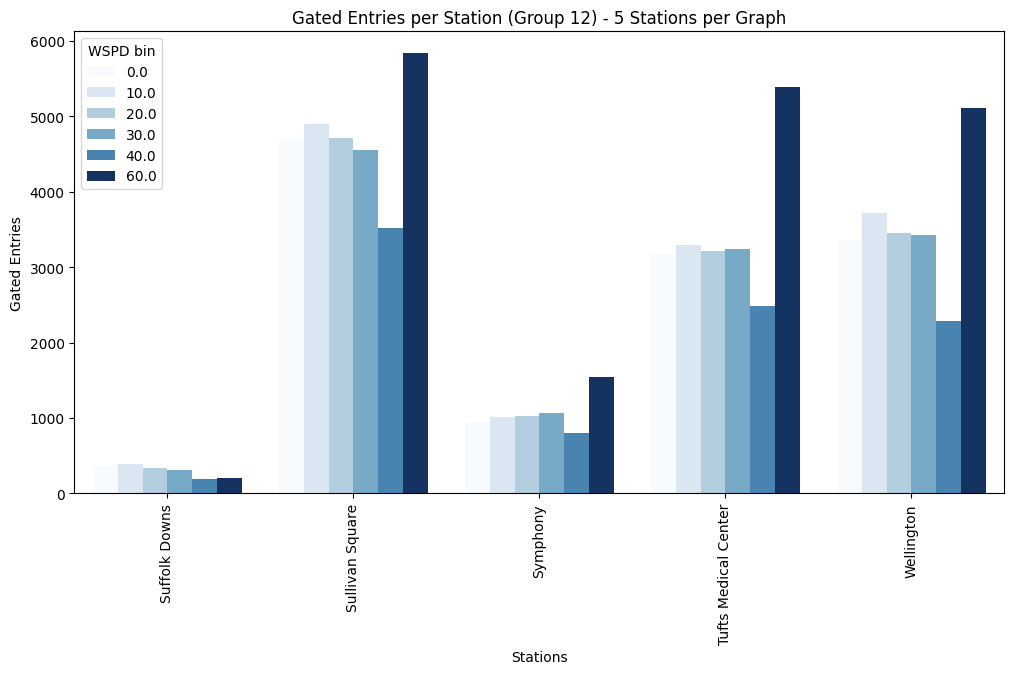

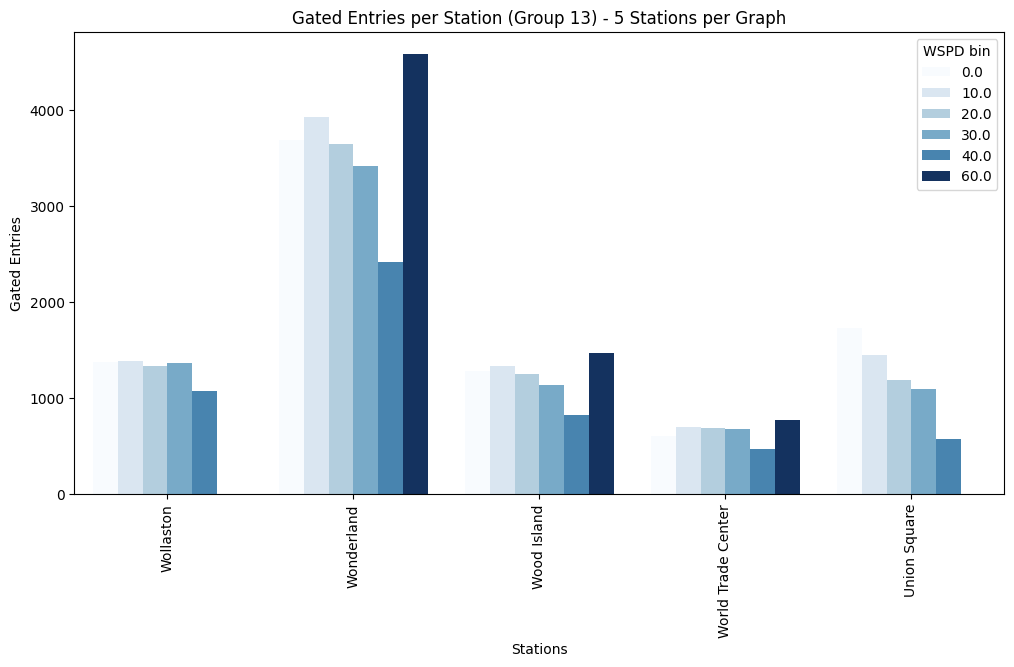

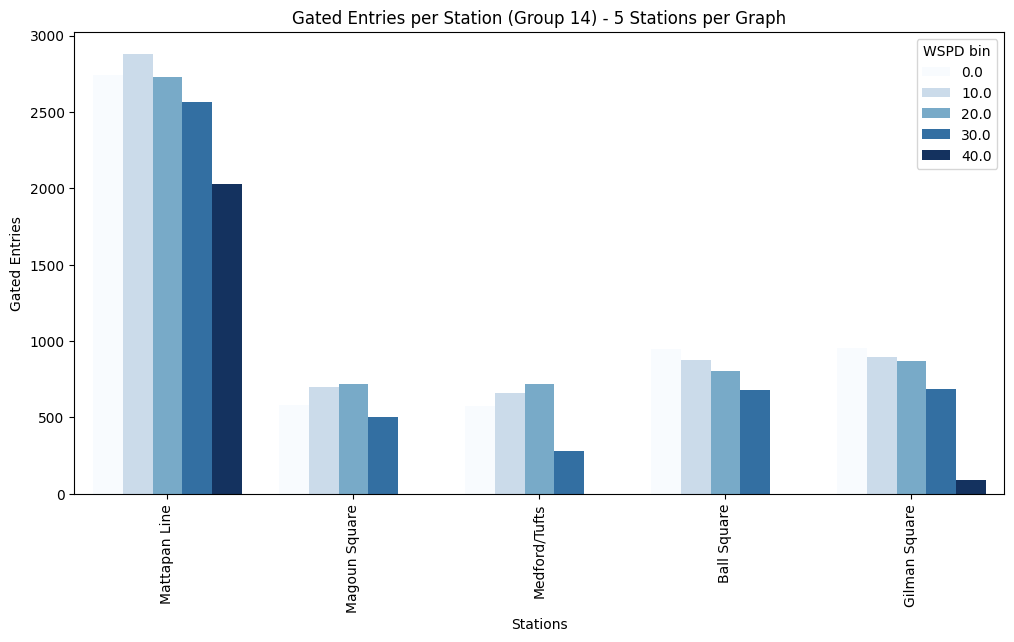

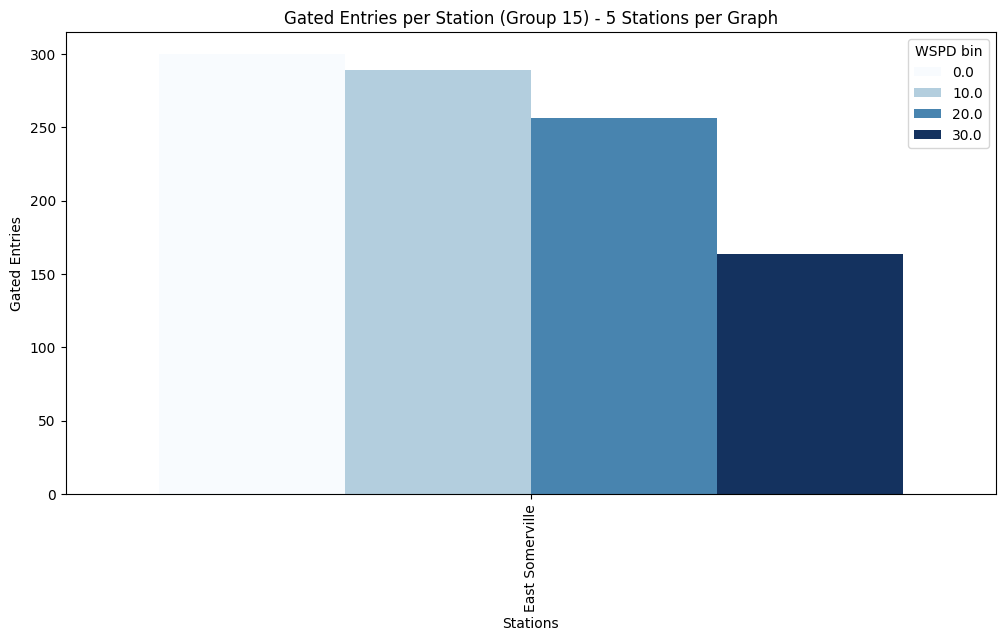

In [45]:
# Create bins for tavg in steps of 10 degrees

df["wspd_bin"] = (df["wspd"] // 10) * 10  # Grouping by 10-degree bins

# Get unique station names
stations = df["station_name"].unique()

# Split stations into chunks of 5c
station_groups = [stations[i:i + 5] for i in range(0, len(stations), 5)]

# Generate multiple graphs, each with 5 stations
for i, group in enumerate(station_groups):
    plt.figure(figsize=(12, 6))  # Set figure size

    # Filter data for the current group of 5 stations
    subset_df = df[df["station_name"].isin(group)]

    # Create bar plot
    sns.barplot(data=subset_df, x="station_name", y="gated_entries", hue="wspd_bin", palette="Blues", errorbar=None)

    # Customize plot
    plt.xticks(rotation=90)  # Rotate x-axis labels for readability
    plt.xlabel("Stations")
    plt.ylabel("Gated Entries")
    plt.title(f"Gated Entries per Station (Group {i+1}) - 5 Stations per Graph")
    plt.legend(title="WSPD bin")

    # Show plot
    plt.show()

This trend is similar to precipitation patterns, and there is also a correlation with wind conditions.